1. Получение данных.
    * Визуализация первых десяти изображений.
2. Кластеризация и оценка качества.
    * Визуализизация центров кластеров.
    * Анализ зависимости метрик от числа кластеров.
3. Снижение размерности признакового пространства.
4. Выводы.

In [6]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import mglearn
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

Загружаем данные

In [41]:
faces = fetch_lfw_people(min_faces_per_person=53)
print(len(faces.target_names))
print(faces.images.shape)

10
(1456, 62, 47)


Визуализируем первые 10 изображений

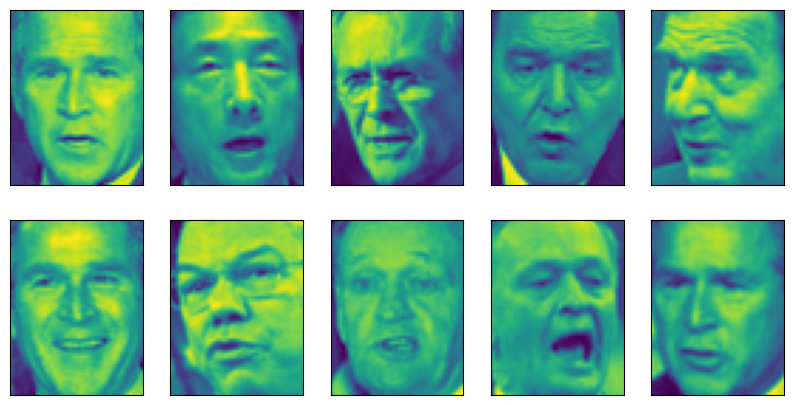

In [42]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                            subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), faces.images):
    ax.imshow(img)

Попробуем выполнить кластеризацию без уменьшения размерности данных

Форма данных: (1456, 2914)


d:\soft\Anaconda\envs\DZ3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


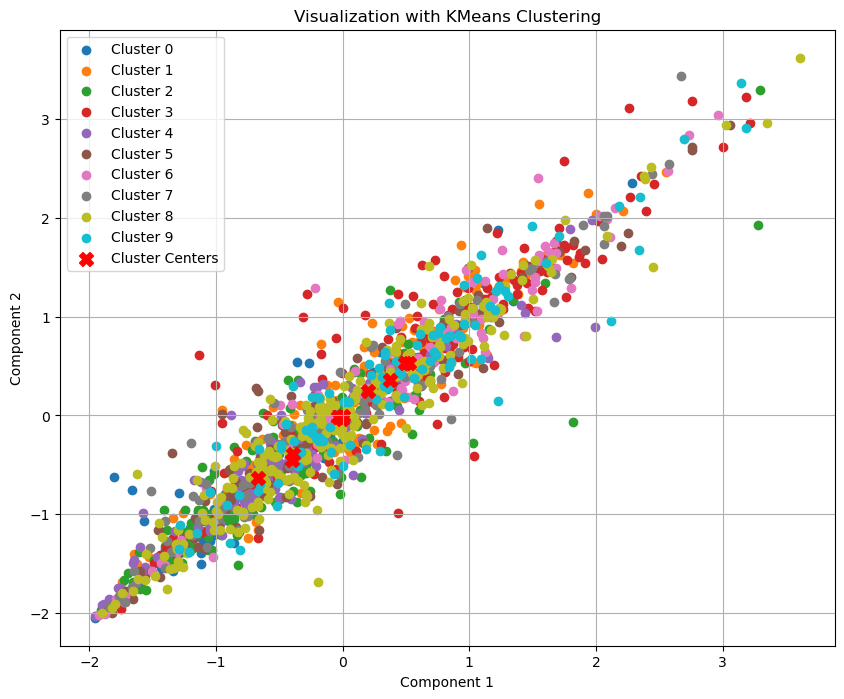

Центры кластеров:
[[-0.6703652  -0.62958425 -0.62979865 ...  0.13328326  0.1564889
   0.16849215]
 [ 0.20236355  0.24513708  0.2934535  ...  0.15291578  0.12745741
   0.09105686]
 [-0.40153408 -0.44940558 -0.47728062 ... -0.12855682 -0.12369188
  -0.08912189]
 ...
 [ 0.00339429 -0.01013997 -0.06541184 ... -0.30053475 -0.31615782
  -0.3282286 ]
 [-0.00164705 -0.03103941 -0.0780168  ... -0.12118641 -0.11233682
  -0.10554855]
 [ 0.37702492  0.35865495  0.33984697 ... -0.15700826 -0.13325462
  -0.1083326 ]]


In [43]:

# 1. Загрузка данных LFW
#lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4)
X = faces.data  # Массив признаков (векторизованные изображения)
y = faces.target  # Целевые метки (персоны)
target_names = faces.target_names  # Имена персон

print(f"Форма данных: {X.shape}")  # (N_образцов, N_признаков)

# 2. Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 3. Кластеризация с KMeans
n_clusters = len(target_names)  # Число кластеров = число персон
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# 4. Визуализация кластеров
plt.figure(figsize=(10, 8))

for i in range(n_clusters):
    cluster_points = X_scaled[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

# 5. Визуализация центров кластеров
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    s=100,
    marker='X',
    label='Cluster Centers',
)

plt.title("Visualization with KMeans Clustering")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid()
plt.show()

# 6. Вывод центров кластеров
print("Центры кластеров:")
print(centroids)



Применим PCA - метод снижения размерности данных.

d:\soft\Anaconda\envs\DZ3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


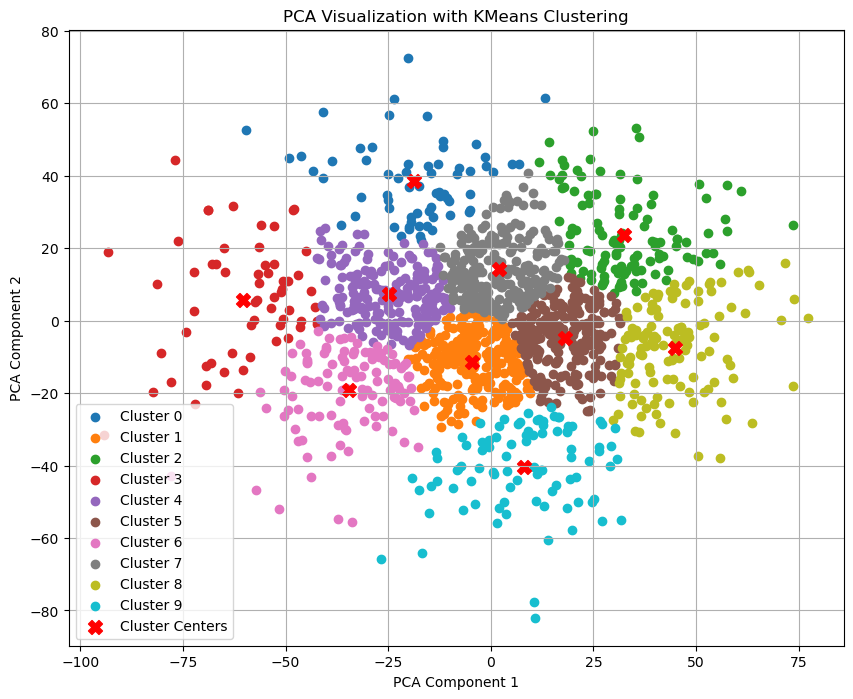

Центры кластеров в пространстве PCA:
[[-18.607443   38.55759  ]
 [ -4.497029  -11.282073 ]
 [ 32.528053   23.757814 ]
 [-60.315357    5.831067 ]
 [-24.84615     7.2575235]
 [ 18.02978    -4.6531563]
 [-34.432083  -19.062294 ]
 [  1.9118768  14.2026   ]
 [ 44.7832     -7.552609 ]
 [  8.086411  -40.351128 ]]


In [44]:
# 1. Уменьшение размерности с помощью PCA
X_pca = PCA(n_components=2, random_state=42).fit_transform(X_scaled)


# 2. Кластеризация с KMeans
n_clusters = len(target_names)  # Число кластеров = число персон
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

# 3. Визуализация кластеров
plt.figure(figsize=(10, 8))

for i in range(n_clusters):
    cluster_points = X_pca[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

# 4. Визуализация центров кластеров
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    s=100,
    marker='X',
    label='Cluster Centers',
)

plt.title("PCA Visualization with KMeans Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()

# 5. Вывод центров кластеров
print("Центры кластеров в пространстве PCA:")
print(centroids)

Применим t-SNE - метод снижения размерности и визуализации данных, который позволяет сохранить локальные структуры данных и обнаруживать нелинейные зависимости.

d:\soft\Anaconda\envs\DZ3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


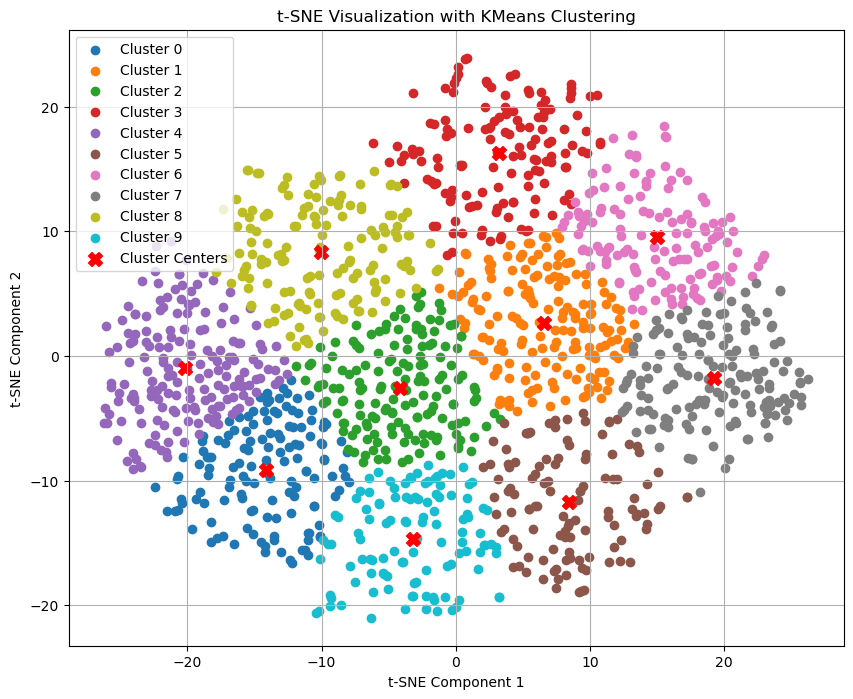

Центры кластеров в пространстве t-SNE:
[[-14.178157   -9.184542 ]
 [  6.537997    2.6146736]
 [ -4.143331   -2.5551744]
 [  3.1927056  16.305172 ]
 [-20.173168   -1.0011898]
 [  8.444257  -11.686904 ]
 [ 14.977853    9.576727 ]
 [ 19.260185   -1.7731262]
 [-10.012587    8.321971 ]
 [ -3.2123103 -14.642019 ]]


In [45]:

# 1. Уменьшение размерности с помощью t-SNE
X_tsne = TSNE(n_components=2, perplexity=50, random_state=42).fit_transform(X_scaled)


# 2. Кластеризация с KMeans
n_clusters = len(target_names)  # Число кластеров = число персон
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_tsne)
labels = kmeans.labels_

# 3. Визуализация кластеров
plt.figure(figsize=(10, 8))

for i in range(n_clusters):
    cluster_points = X_tsne[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

# 4. Визуализация центров кластеров
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    s=100,
    marker='X',
    label='Cluster Centers',
)

plt.title("t-SNE Visualization with KMeans Clustering")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.grid()
plt.show()

# 5. Вывод центров кластеров
print("Центры кластеров в пространстве t-SNE:")
print(centroids)




Считаем метрики и строим графики

In [46]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
#X_scaled=scaler.fit_transform(X_tsne)
X_scaled=X_tsne
for i in range(2,15):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    #print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    #print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    #print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))

d:\soft\Anaconda\envs\DZ3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
d:\soft\Anaconda\envs\DZ3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
d:\soft\Anaconda\envs\DZ3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
d:\soft\Anaconda\envs\DZ3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

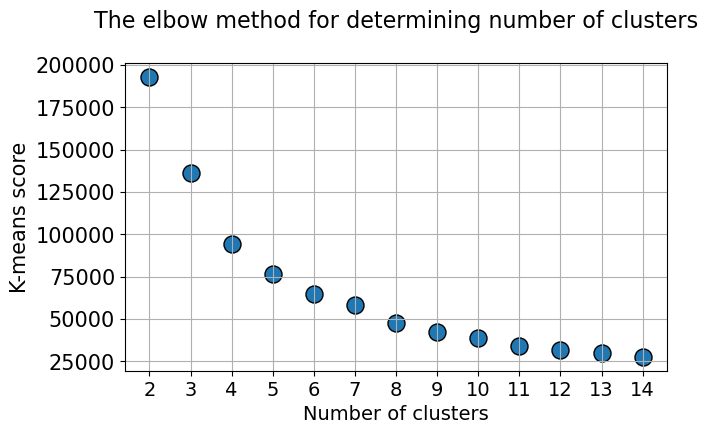

In [47]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,15)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

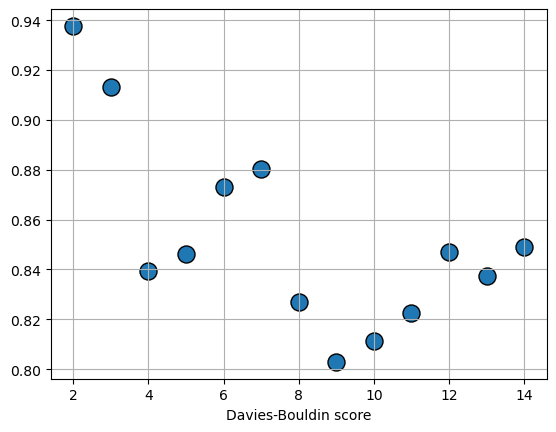

In [48]:
plt.scatter(x=[i for i in range(2,15)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

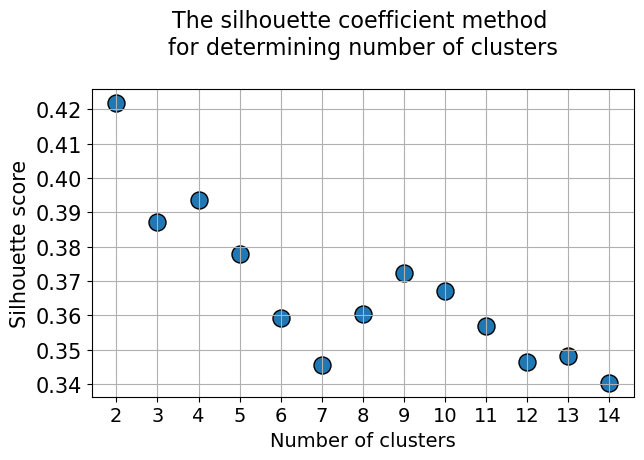

In [49]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,15)],fontsize=14)
plt.yticks(fontsize=15)

plt.show()

Выводы:
1. Кластеризация без уменьшения размерности данных не привела к положительным результатам.
2. Кластеризация с предварительным уменьшением размерности данных дает лучший результат, однако границы кластеров нечеткие, кластеры пересекаются.
3. Для используемых данных значения метрик неоднозначны и сложно интерпретируемы. Однако, Davies-Bouldin score показывает, что лучшее число кластеров - 9.